# Q-Score

In [1]:
%load_ext autoreload
%autoreload 2

from iqm.benchmarks.optimization.qscore import *
import random

## Choose (or define) a backend

In [2]:
backend = "fakeadonis"
#backend = "fakeapollo"
#backend = "garnet"
#backend = "deneb"
#backend = "pyrite"

## Set IQM Token if using Resonance.

In [3]:
import os
os.environ["IQM_TOKEN"] = "XXXXXXXXXXXXXX"

## Qscore Configuration

In [4]:
EXAMPLE_QSCORE = QScoreConfiguration(
    num_instances = 100,
    num_qaoa_layers= 1,
    shots = 10000,
    calset_id=None, # calibration set ID, default is None
    min_num_nodes =  2,
    max_num_nodes= None, # to run for all the node sizes
    use_virtual_node = True,
    use_classically_optimized_angles = True,
    choose_qubits_routine = "custom",
    custom_qubits_array=[
                    [2],
                    [2, 0],
                    [2, 0, 1],
                    [2, 0, 1, 3],
                    [2, 0, 1, 3, 4],
                    [2, 0, 1, 3, 4]],
    seed = 1,
    REM = False,
    mit_shots = 1000,
    )

## Run the experiment

In [5]:
benchmark_qscore = QScoreBenchmark(backend, EXAMPLE_QSCORE)
run0_qscore = benchmark_qscore.run()

## Perform Analysis

In [6]:
result0_qscore = benchmark_qscore.analyze()

2025-02-06 07:26:45,052 - iqm.benchmarks.logging_config - INFO - Q-Score = 2 passed with approximation ratio (Beta) 0.6753; Avg MaxCut size: 0.5900
2025-02-06 07:26:45,657 - iqm.benchmarks.logging_config - INFO - Q-Score = 3 passed with approximation ratio (Beta) 0.6709; Avg MaxCut size: 1.3706
2025-02-06 07:26:46,532 - iqm.benchmarks.logging_config - INFO - Q-Score = 4 passed with approximation ratio (Beta) 0.6072; Avg MaxCut size: 2.3647
2025-02-06 07:26:47,676 - iqm.benchmarks.logging_config - INFO - Q-Score = 5 passed with approximation ratio (Beta) 0.4650; Avg MaxCut size: 3.4254
2025-02-06 07:26:49,320 - iqm.benchmarks.logging_config - INFO - Q-Score = 6 passed with approximation ratio (Beta) 0.4118; Avg MaxCut size: 4.8274


In [7]:
result0_qscore.observations

[BenchmarkObservation(name='mean_approximation_ratio', value=0.6753267011332195, identifier=BenchmarkObservationIdentifier(qubit_indices=2), uncertainty=0.09818278368319852),
 BenchmarkObservation(name='is_succesful', value='True', identifier=BenchmarkObservationIdentifier(qubit_indices=2), uncertainty=None),
 BenchmarkObservation(name='Qscore_result', value=2, identifier=BenchmarkObservationIdentifier(qubit_indices=2), uncertainty=None),
 BenchmarkObservation(name='mean_approximation_ratio', value=0.670945883615108, identifier=BenchmarkObservationIdentifier(qubit_indices=3), uncertainty=0.07179284502033013),
 BenchmarkObservation(name='is_succesful', value='True', identifier=BenchmarkObservationIdentifier(qubit_indices=3), uncertainty=None),
 BenchmarkObservation(name='Qscore_result', value=3, identifier=BenchmarkObservationIdentifier(qubit_indices=3), uncertainty=None),
 BenchmarkObservation(name='mean_approximation_ratio', value=0.6072450842696627, identifier=BenchmarkObservationIde

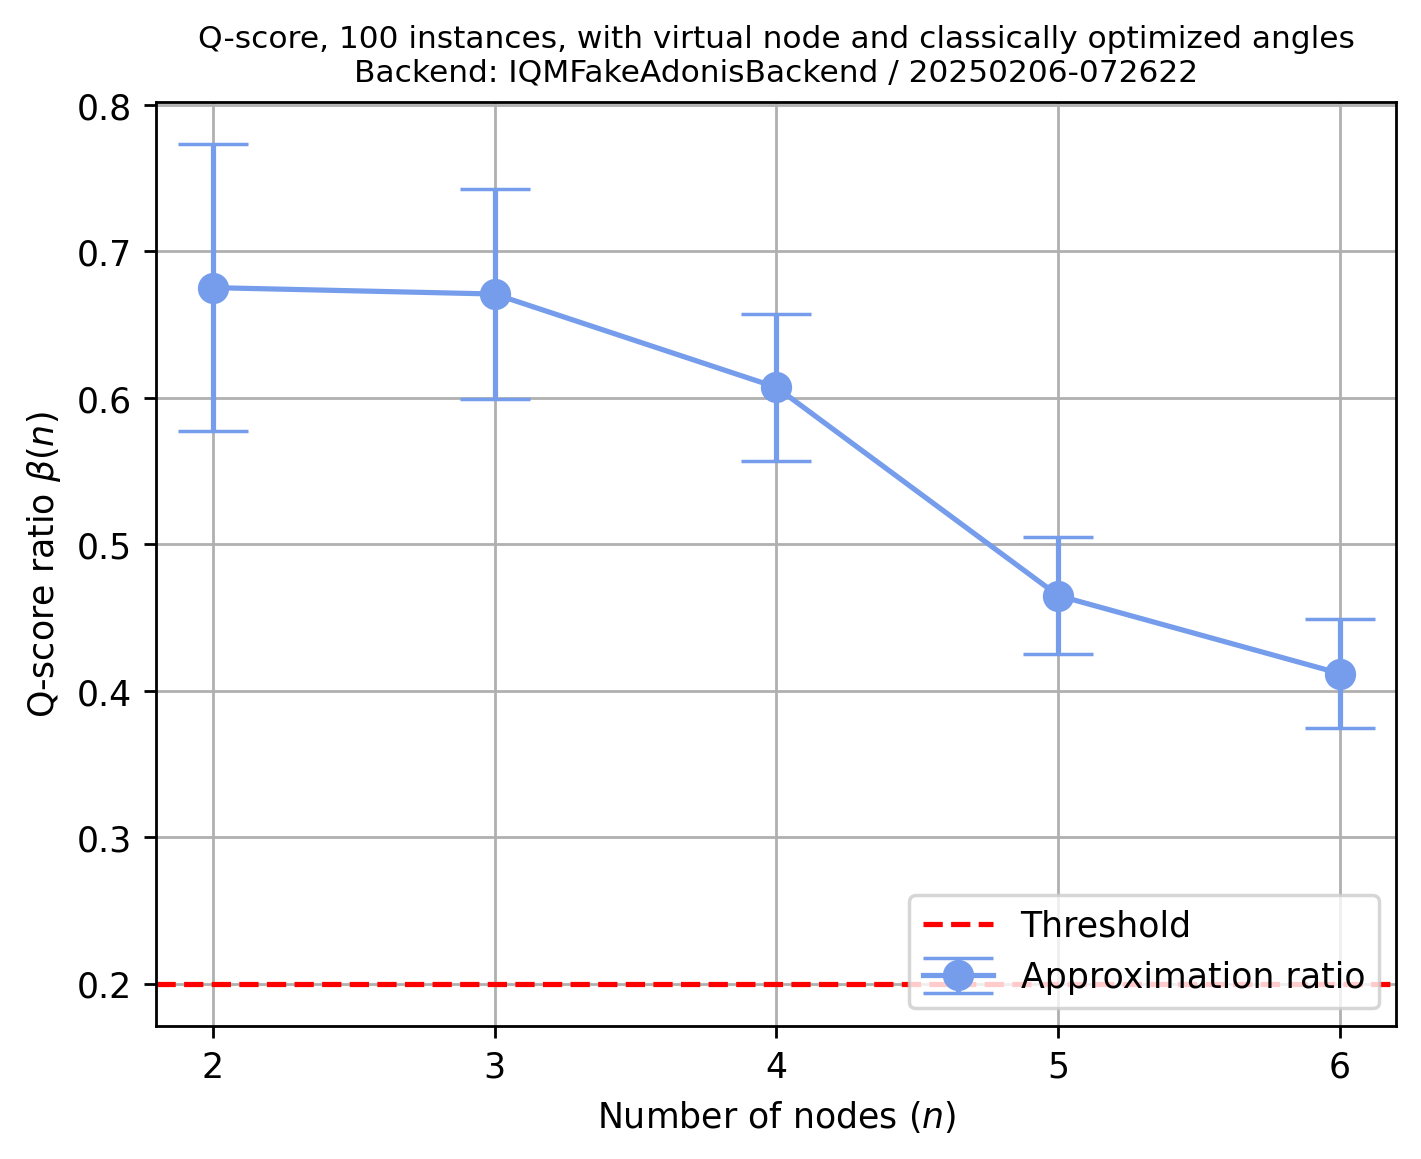

In [8]:
result0_qscore.plot_all()

## Execution with REM

In [9]:
EXAMPLE_QSCORE = QScoreConfiguration(
    num_instances = 100,
    num_qaoa_layers= 1,
    shots = 10000,
    calset_id=None, # calibration set ID, default is None
    min_num_nodes =  2,
    max_num_nodes=None,
    use_virtual_node = True,
    use_classically_optimized_angles = True,
    choose_qubits_routine = "custom",
    custom_qubits_array=[
                    [2],
                    [2, 0],
                    [2, 0, 1],
                    [2, 0, 1, 3],
                    [2, 0, 1, 3, 4],
                    [2, 0, 1, 3, 4]],
    seed = 1,
    REM = True,
    mit_shots = 1000,
    )

In [10]:
benchmark_qscore = QScoreBenchmark(backend, EXAMPLE_QSCORE)
run0_qscore = benchmark_qscore.run()

In [11]:
result0_qscore = benchmark_qscore.analyze()

2025-02-06 07:27:11,305 - iqm.benchmarks.logging_config - INFO - Q-Score = 2 passed with approximation ratio (Beta) 0.6753; Avg MaxCut size: 0.5900
2025-02-06 07:27:11,932 - iqm.benchmarks.logging_config - INFO - Q-Score = 3 passed with approximation ratio (Beta) 0.6708; Avg MaxCut size: 1.3704
2025-02-06 07:27:12,824 - iqm.benchmarks.logging_config - INFO - Q-Score = 4 passed with approximation ratio (Beta) 0.6066; Avg MaxCut size: 2.3638
2025-02-06 07:27:14,013 - iqm.benchmarks.logging_config - INFO - Q-Score = 5 passed with approximation ratio (Beta) 0.4655; Avg MaxCut size: 3.4264
2025-02-06 07:27:15,722 - iqm.benchmarks.logging_config - INFO - Q-Score = 6 passed with approximation ratio (Beta) 0.4128; Avg MaxCut size: 4.8299


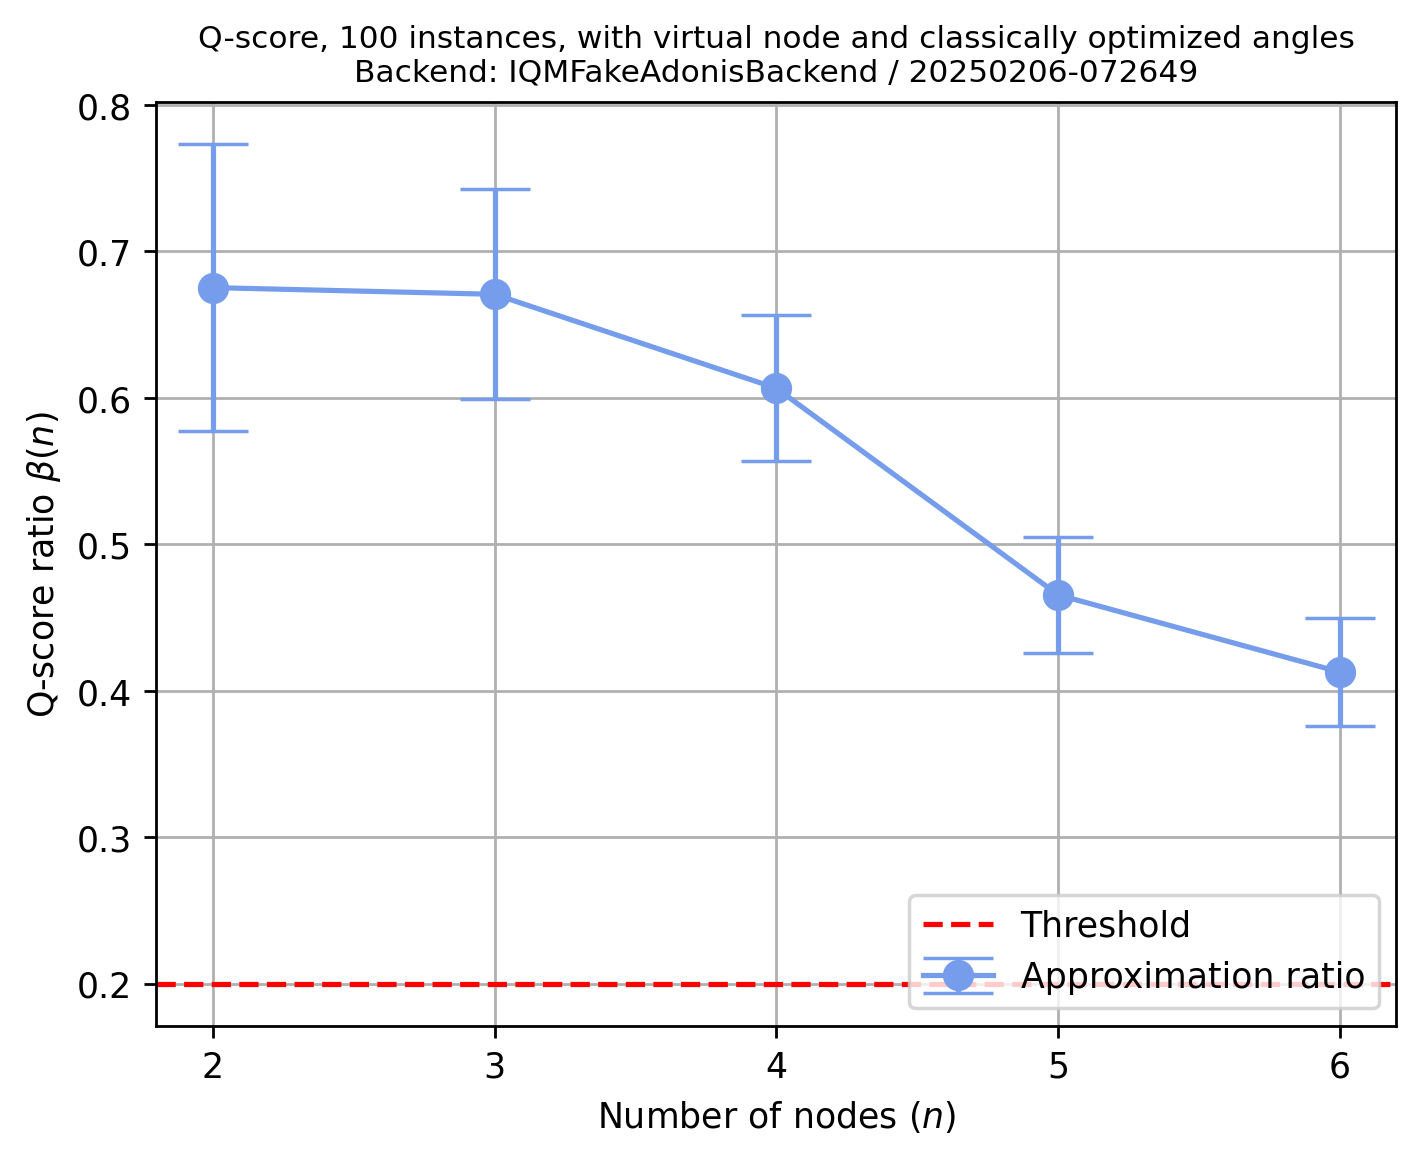

In [12]:
result0_qscore.plot_all()